# Combined Topic Modeling for Analysis of ACL Articles.

This code is adapt from the paper on contextualized topic models"

First, we install the contextualized topic model library

In [ ]:
!pip install contextualized-topic-models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyldavis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
%cd "/content/gdrive/MyDrive/NLP_CSS_Topic_Model/"

/content/gdrive/MyDrive/NLP_CSS_Topic_Model


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Preprocessing

Why do we use the **preprocessed text** here? We need text without punctuation to build the bag of word. Also, we might want only to have the most frequent words inside the BoW. Too many words might not help.

In [ ]:
from nltk.corpus import stopwords as stop_words
import pandas as pd

nltk.download('stopwords')

# documents corresponding to the ACL abstracts
acl_articles = pd.read_parquet("acl-publication-info.74k.v2.parquet")

# each line corresponds to an abstract of the acl anthology
documents = []

for idx, row in acl_articles.iterrows():
  if row["abstract"] is not None:
    documents.append(row["abstract"])


stopwords = list(stop_words.words("english"))

sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords)

preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We don't discard the non-preprocessed texts, because we are going to use them as input for obtaining the contextualized document representations.

Let's pass our files with preprocess and unpreprocessed data to our `TopicModelDataPreparation` object. This object takes care of creating the bag of words for you and of obtaining the contextualized BERT representations of documents. This operation allows us to create our training dataset.

Note: Here we use the contextualized model "paraphrase-distilroberta-base-v1".


In [ ]:
tp = TopicModelDataPreparation("all-mpnet-base-v2")

training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/contextualized_topic_models/utils/data_preparation.py:64: UserWarning: the longest document in your collection has 2993 words, the model instead truncates to 128 tokens.
  warnings.warn(


Batches:   0%|          | 0/338 [00:00<?, ?it/s]

## Training our Combined TM

Finally, we can fit our new topic model. We will ask the model to find 10 most salient topics in our collection.

In [ ]:
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=10, num_epochs=10)
ctm.fit(training_dataset) # run the model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
0it [00:00, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch: [10/10]	 Seen Samples: [675200/675340]	Train Loss: 459.2038310118761	Time: 0:00:07.362033: : 10it [01:17,  7.76s/it]
100%|██████████| 1056/1056 [00:04<00:00, 213.07it/s]


In [ ]:
ctm.get_topic_lists(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['distributions', 'projection', 'weight', 'align', 'pseudo'],
 ['models', 'training', 'data', 'language', 'model'],
 ['model', 'attention', 'neural', 'information', 'propose'],
 ['dialogue', 'user', 'generation', 'questions', 'question'],
 ['task', 'features', 'classification', 'semeval', 'tweets'],
 ['corpus', 'annotation', 'language', 'speech', 'research'],
 ['translation', 'machine', 'english', 'system', 'mt'],
 ['de', 'des', 'et', 'un', 'en'],
 ['parsing', 'semantic', 'parser', 'grammar', 'syntactic'],
 ['word', 'words', 'method', 'using', 'sense']]

# Topic Predictions

Ok now we can take a document and see which topic has been assigned to it. Results will obviously change with respect to the documents you are using. For example, let's predict the topic of the first preprocessed document that is talking about a peninsula.

In [ ]:
topics_predictions = ctm.get_thetas(training_dataset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 1056/1056 [00:04<00:00, 212.12it/s]


In [ ]:
import numpy as np


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
document_topics = []
for i in range(len(topics_predictions)):
  document_topics.append(np.argmax(topics_predictions[i]))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(document_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


67534

In [ ]:
# filter out the ACL articles whose abstract is None
acl_articles_filtered = acl_articles[acl_articles["abstract"].notna()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
acl_articles_filtered.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(67669, 25)

In [ ]:
retained_acl_articles = acl_articles_filtered.iloc[retained_indices]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics = pd.Series(document_topics,name="Topic")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
retained_acl_articles.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
retained_acl_articles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,acl_id,abstract,full_text,corpus_paper_id,pdf_hash,numcitedby,url,publisher,address,year,...,doi,number,volume,journal,editor,isbn,ENTRYTYPE,ID,language,note
0,O02-2002,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...,18022704,0b09178ac8d17a92f16140365363d8df88c757d0,14,https://aclanthology.org/O02-2002,None,None,2002,...,None,None,None,None,None,None,inproceedings,chen-you-2002-study,None,None
1,R13-1042,Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...,16703040,3eb736b17a5acb583b9a9bd99837427753632cdb,10,https://aclanthology.org/R13-1042,"INCOMA Ltd. Shoumen, BULGARIA","Hissar, Bulgaria",2013,...,None,None,None,None,None,None,inproceedings,jamison-gurevych-2013-headerless,None,None
2,W05-0819,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al...",1215281,b20450f67116e59d1348fc472cfc09f96e348f55,15,https://aclanthology.org/W05-0819,Association for Computational Linguistics,"Ann Arbor, Michigan",2005,...,None,None,None,None,None,None,inproceedings,aswani-gaizauskas-2005-aligning,None,None
3,R13-1044,The paper 1 presents a rule-based approach to ...,The paper 1 presents a rule-based approach to ...,2491460,c0f1047fe0f95c367184d494e78bb07b11ee3608,2,https://aclanthology.org/R13-1044,"INCOMA Ltd. Shoumen, BULGARIA","Hissar, Bulgaria",2013,...,None,None,None,None,None,None,inproceedings,kedzia-maziarz-2013-recognizing,None,None
4,W05-0818,"In this paper we describe LIHLA, a lexical ali...","In this paper we describe LIHLA, a lexical ali...",15322146,ff3f05120d24e5dac2879f25402993bc6355f780,5,https://aclanthology.org/W05-0818,Association for Computational Linguistics,"Ann Arbor, Michigan",2005,...,None,None,None,None,None,None,inproceedings,caseli-etal-2005-lihla,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67529,P99-1002,This paper describes recent progress and the a...,This paper describes recent progress and the a...,715160,ab17a01f142124744c6ae425f8a23011366ec3ee,11,https://aclanthology.org/P99-1002,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034680,None,None,None,None,None,inproceedings,furui-1999-automatic,None,None
67530,P00-1009,We present an LFG-DOP parser which uses fragme...,We present an LFG-DOP parser which uses fragme...,1356246,ad005b3fd0c867667118482227e31d9378229751,12,https://aclanthology.org/P00-1009,Association for Computational Linguistics,Hong Kong,2000,...,10.3115/1075218.1075227,None,None,None,None,None,inproceedings,bod-2000-improved,None,None
67531,P99-1056,The processes through which readers evoke ment...,The processes through which readers evoke ment...,7277828,924cf7a4836ebfc20ee094c30e61b949be049fb6,14,https://aclanthology.org/P99-1056,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034745,None,None,None,None,None,inproceedings,lange-content-1999-grapho,None,None
67532,P99-1051,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...,1829043,6b1f6f28ee36de69e8afac39461ee1158cd4d49a,92,https://aclanthology.org/P99-1051,Association for Computational Linguistics,"College Park, Maryland, USA",1999,...,10.3115/1034678.1034740,None,None,None,None,None,inproceedings,lapata-1999-acquiring,None,None


In [ ]:
# concatenate topics to the ACL articles
retained_acl_articles_with_topics = pd.concat([retained_acl_articles, topics], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics_counts = retained_acl_articles_with_topics['Topic'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


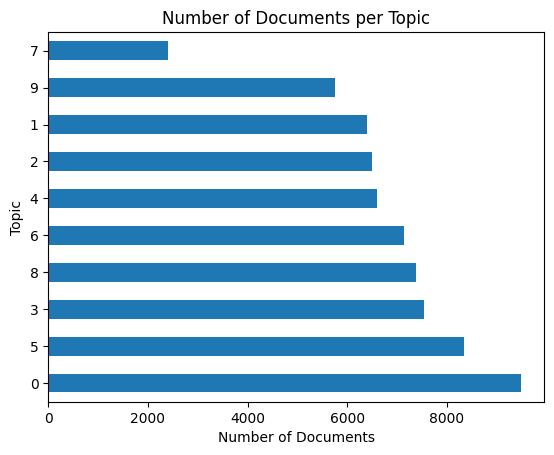

In [ ]:
topics_counts.plot(kind="barh")
import matplotlib.pyplot as plt
plt.xlabel("Number of Documents")
plt.ylabel("Topic")
plt.title("Number of Documents per Topic")
plt.show()

In [ ]:
retained_acl_articles_with_topics.to_csv("retained_acl_articles_with_topics.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
